In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [20]:
#LOAD DATASET (data is already cleaned from notebook.ipynb)
song_df = pd.read_csv("processed_song_data.csv")

song_df.head()

,Track Name,Artist Name(s),Album Name,Album Artist Name(s),Explicit,age,artist_name,dating,family/gospel,genre,...,feelings,light/visual_perceptions,like/girls,movement/places,music,obscene,sadness,shake_the_audience,mood_%,mood
0,Justified & Ancient - Stand by the Jams,The KLF,Songs Collection,The KLF,False,1.0,mukesh,0.000598,0.048857,pop,...,0.117175,0.000598,0.000598,0.000598,0.039288,0.000598,0.380299,0.000598,0.426354,Neutral
1,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,Pitbull,False,1.0,'frankie laine',0.035537,0.027007,pop,...,0.001284,0.212681,0.001284,0.001284,0.118034,0.001284,0.001284,0.001284,0.770510,High Emotion
2,From the Bottom of My Broken Heart,Britney Spears,...Baby One More Time (Digital Deluxe Version),Britney Spears,False,1.0,'johnnie ray',0.002770,0.002770,pop,...,0.225422,0.002770,0.002770,0.002770,0.323794,0.002770,0.002770,0.002770,0.683601,High Emotion
3,Apeman - 2014 Remastered Version,The Kinks,"Lola vs. Powerman and the Moneygoround, Pt. On...",The Kinks,False,1.0,'prez prado',0.048249,0.001548,pop,...,0.001548,0.001548,0.081132,0.129250,0.001548,0.001548,0.225889,0.021500,0.604193,High Emotion
4,You Can't Always Get What You Want,The Rolling Stones,Let It Bleed,The Rolling Stones,False,1.0,'giorgos papadopoulos',0.001350,0.001350,pop,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.068800,0.001350,0.523334,Neutral


In [21]:
# Step 4: Feature Extraction
# split data into features and labels.
song_X = song_df.drop(columns=[
    # these are y variables
    'mood', 'mood_%',
    # these are too specific and may lead to overfitting
    'Track Name', 'Artist Name(s)', 'Album Name', 'Album Artist Name(s)', 'artist_name', 'track_name',
    # these are directly used to calculate mood, so to prevent data leakage we will drop them
    "Energy", "Valence", "sadness"
])

song_y = song_df['mood']

In [22]:
# encode labels

# Select categorical columns
categorical_columns = ["genre", "topic"]
categorical_features = song_X[categorical_columns]

# OneHotEncode categorical features
onehot_encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='error')
onehot_encoded_features = onehot_encoder.fit_transform(categorical_features)

one_hot_encoded_df = pd.DataFrame(onehot_encoded_features,
                                  columns=onehot_encoder.get_feature_names_out(categorical_columns))

one_hot_encoded_df.head()

,genre_blues,genre_country,genre_jazz,genre_pop,genre_reggae,genre_rock,topic_music,topic_night/time,topic_obscene,topic_romantic,topic_sadness,topic_violence,topic_world/life
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [23]:
# Scale numerical features with Robust Scaler to prevent outliers
# Select numerical columns
numerical_columns = song_X.drop(columns=categorical_columns)

# scale features
robust_scaler = RobustScaler()
scaled_numerical_song_X = robust_scaler.fit_transform(numerical_columns)

# add scaled features back to dataset
song_df_scaled = pd.DataFrame(scaled_numerical_song_X, columns=numerical_columns.columns)

song_df_scaled.head()

,Explicit,age,dating,family/gospel,night/time,romantic,violence,world/life,Danceability,Key,...,Tempo,communication,family/spirtual,feelings,light/visual_perceptions,like/girls,movement/places,music,obscene,shake_the_audience
0,0.0,1.354839,-0.304616,13.753176,-0.020203,0.388631,0.325838,-0.021807,0.009088,2.831565,...,-10.050823,2.019382,-0.046505,3.715431,-0.020727,-0.036869,-0.021489,0.651982,-0.012583,-0.083452
1,0.0,1.354839,12.015053,7.412837,-0.009395,-0.010446,0.501583,2.284810,0.217088,-3.168435,...,5.536177,-0.010424,2.090158,-0.015152,3.409123,-0.011510,-0.008092,2.022035,-0.005493,-0.026053
2,0.0,1.354839,0.461240,0.379585,0.014036,3.956966,0.001404,-0.010494,0.069088,1.831565,...,-46.527823,1.918204,0.045345,7.199923,0.014399,0.043467,0.020954,5.601954,0.009878,0.098386
3,0.0,1.354839,16.497359,0.024956,-0.005229,10.338176,-0.005099,-0.016859,0.075088,3.831565,...,-46.197823,-0.008380,-0.006335,-0.006644,-0.005364,2.941837,2.492491,-0.004644,-0.002760,1.666475
4,0.0,1.354839,-0.039654,-0.032634,-0.008358,11.647211,-0.006155,2.151139,-0.288912,-5.168435,...,-35.690823,-0.009915,1.186473,-0.013032,-0.008574,-0.009075,-0.006805,-0.008096,-0.004812,-0.020542


In [24]:
# combine scaled numerical features and onehot encoded features
processed_song_X = pd.concat([song_df_scaled, one_hot_encoded_df], axis=1)
print(processed_song_X.shape)
processed_song_X.head()

(27866, 38)


,Explicit,age,dating,family/gospel,night/time,romantic,violence,world/life,Danceability,Key,...,genre_pop,genre_reggae,genre_rock,topic_music,topic_night/time,topic_obscene,topic_romantic,topic_sadness,topic_violence,topic_world/life
0,0.0,1.354839,-0.304616,13.753176,-0.020203,0.388631,0.325838,-0.021807,0.009088,2.831565,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.354839,12.015053,7.412837,-0.009395,-0.010446,0.501583,2.284810,0.217088,-3.168435,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.354839,0.461240,0.379585,0.014036,3.956966,0.001404,-0.010494,0.069088,1.831565,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.354839,16.497359,0.024956,-0.005229,10.338176,-0.005099,-0.016859,0.075088,3.831565,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.354839,-0.039654,-0.032634,-0.008358,11.647211,-0.006155,2.151139,-0.288912,-5.168435,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [25]:
LABELS = ["High Emotion", "Neutral", "Low Emotion"]

In [26]:
song_y_labels = song_y.copy()
song_y = song_y.replace({
    "High Emotion": 0,
    "Neutral": 1,
    "Low Emotion": 2
})

In [27]:
# Split the dataset into training (60%), validation (20%), and test (20%) sets

X_train, X_test, y_train, y_test = train_test_split(processed_song_X, song_y, test_size=0.2, random_state=42,
                                                    stratify=song_y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

# XGBoost Model (default)

In [28]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [29]:
# Train the model with grid search cv
grid = {
    "n_estimators": [50, 100, 200],
    "gamma": [0, 0.1, 0.2],
    "max_depth": [2, 4, 6],
    "learning_rate": [0.1, 0.01, 0.001],
    "subsample": [0.5, 0.7, 1],
    "gamma": [0, 0.1, 0.2]
}

In [30]:
xgb_model = xgb.XGBClassifier(objective="multi:softmax", num_class=3, eval_metric="mlogloss", device="cuda", verbose=1,
                              n_jobs=-1)

xgb_model = GridSearchCV(xgb_model, grid, n_jobs=-1, verbose=1)

In [31]:
xgb_model.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[04:40:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "device", "verbose" } are not used.



GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device='cuda',
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     lear...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1, num_class=3,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [2, 4, 6], 'n_estimators': [50, 100, 200],
                         'subsample': [0.5, 0.7, 1]},
             verbose=1)

In [32]:
xgb_model.best_params_

{'gamma': 0.2,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 200,
 'subsample': 0.5}

In [33]:
print("Train Accuracy: ", xgb_model.score(X_train, y_train))
print("Validation Accuracy: ", xgb_model.score(X_val, y_val))
print("Test Accuracy: ", xgb_model.score(X_test, y_test))

Train Accuracy:  0.9080686643938034
Validation Accuracy:  0.7638614749685986
Test Accuracy:  0.768388948690348


In [51]:
xgb_model_pred = xgb_model.predict(X_test)

y_test_labels = song_y_labels.loc[y_test.index]

xgb_model_pred_labels = pd.Series(xgb_model_pred).replace({
    0: "High Emotion",
    1: "Neutral",
    2: "Low Emotion"
})

print(classification_report(y_test_labels, xgb_model_pred_labels))

              precision    recall  f1-score   support

High Emotion       0.78      0.91      0.84      2932
 Low Emotion       0.70      0.38      0.49       373
     Neutral       0.75      0.64      0.69      2269

    accuracy                           0.77      5574
   macro avg       0.75      0.65      0.68      5574
weighted avg       0.76      0.77      0.76      5574



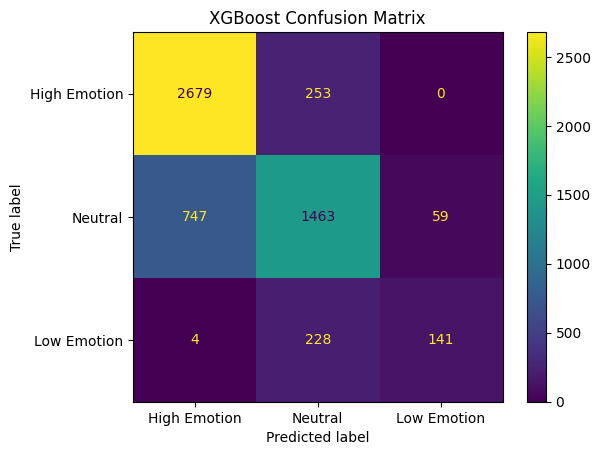

In [52]:
cm_xgb = confusion_matrix(y_test_labels, xgb_model_pred_labels, labels=LABELS)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=LABELS)

disp.plot(values_format='')
plt.title("XGBoost Confusion Matrix")
plt.grid(False)
plt.show()

In [53]:
# Save the model
import pickle

with open("models/xgb_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

# Oversampling

In [59]:
from imblearn.over_sampling import RandomOverSampler

In [60]:
ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [61]:
xgb_ros = xgb.XGBClassifier(objective="multi:softmax", num_class=3, eval_metric="mlogloss", device="cuda",
                            verbose=1, n_jobs=-1)

xgb_ros = GridSearchCV(xgb_ros, grid, n_jobs=-1, verbose=1)


In [62]:
xgb_ros.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[05:03:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "device", "verbose" } are not used.



GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device='cuda',
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     lear...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1, num_class=3,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [2, 4, 6], 'n_estimators': [50, 100, 200],
                         'subsample': [0.5, 0.7, 1]},
             verbose=1)

In [63]:
xgb_ros.best_params_

{'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 200,
 'subsample': 0.7}

In [64]:
print("Train Accuracy: ", xgb_ros.score(X_resampled, y_resampled))
print("Validation Accuracy: ", xgb_ros.score(X_val, y_val))
print("Test Accuracy: ", xgb_ros.score(X_test, y_test))

Train Accuracy:  0.9416780354706685
Validation Accuracy:  0.7566840122016867
Test Accuracy:  0.7680301399354145


In [65]:
xgb_model_resampled_pred = xgb_ros.predict(X_test)

xgb_model_resampled_pred_labels = pd.Series(xgb_model_resampled_pred).replace({
    0: "High Emotion",
    1: "Neutral",
    2: "Low Emotion"
})

print(classification_report(y_test_labels, xgb_model_resampled_pred_labels))

              precision    recall  f1-score   support

High Emotion       0.79      0.90      0.84      2932
 Low Emotion       0.57      0.68      0.62       373
     Neutral       0.77      0.62      0.68      2269

    accuracy                           0.77      5574
   macro avg       0.71      0.73      0.72      5574
weighted avg       0.77      0.77      0.76      5574



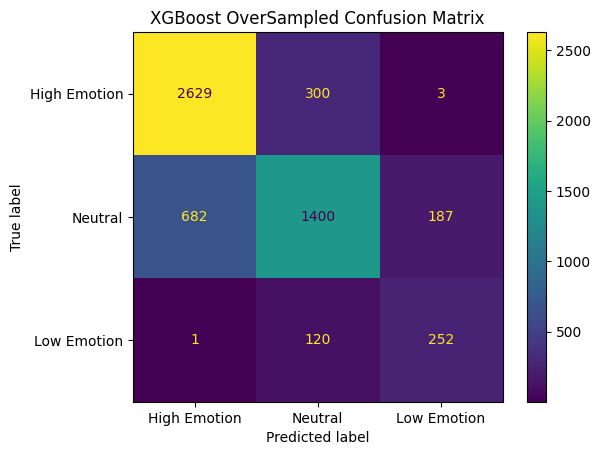

In [66]:
cm_xgb_resampled = confusion_matrix(y_test_labels, xgb_model_resampled_pred_labels, labels=LABELS)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_resampled, display_labels=LABELS)

disp.plot(values_format='')
plt.title("XGBoost OverSampled Confusion Matrix")
plt.grid(False)
plt.show()

In [67]:
# Save the model
with open("models/xgb_ros_model.pkl", "wb") as f:
    pickle.dump(xgb_ros, f)

# Undersampling

In [68]:
from imblearn.under_sampling import RandomUnderSampler

In [69]:
rus = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [70]:
xgb_rus = xgb.XGBClassifier(objective="multi:softmax", num_class=3, eval_metric="mlogloss", device="cuda",
                            verbose=1, n_jobs=-1)

xgb_rus = GridSearchCV(xgb_rus, grid, n_jobs=-1, verbose=1)

In [71]:
xgb_rus.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[05:05:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "device", "verbose" } are not used.



GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device='cuda',
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     lear...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1, num_class=3,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [2, 4, 6], 'n_estimators': [50, 100, 200],
                         'subsample': [0.5, 0.7, 1]},
             verbose=1)

In [72]:
xgb_rus.best_params_

{'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 200,
 'subsample': 0.5}

In [73]:
print("Train Accuracy: ", xgb_rus.score(X_resampled, y_resampled))
print("Validation Accuracy: ", xgb_rus.score(X_val, y_val))
print("Test Accuracy: ", xgb_rus.score(X_test, y_test))

Train Accuracy:  0.9958221426439868
Validation Accuracy:  0.668760093307016
Test Accuracy:  0.6702547542160029


In [74]:
xgb_model_undersampled_pred = xgb_rus.predict(X_test)

xgb_model_undersampled_pred_labels = pd.Series(xgb_model_undersampled_pred).replace({
    0: "High Emotion",
    1: "Neutral",
    2: "Low Emotion"
})

print(classification_report(y_test_labels, xgb_model_undersampled_pred_labels))

              precision    recall  f1-score   support

High Emotion       0.77      0.82      0.79      2932
 Low Emotion       0.36      0.87      0.51       373
     Neutral       0.65      0.45      0.53      2269

    accuracy                           0.67      5574
   macro avg       0.59      0.71      0.61      5574
weighted avg       0.69      0.67      0.67      5574



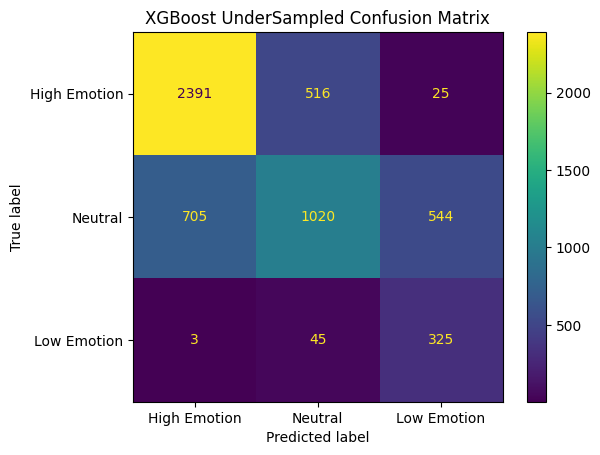

In [75]:
cm_xgb_undersampled = confusion_matrix(y_test_labels, xgb_model_undersampled_pred_labels, labels=LABELS)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_undersampled, display_labels=LABELS)

disp.plot(values_format='')
plt.title("XGBoost UnderSampled Confusion Matrix")
plt.grid(False)
plt.show()

In [76]:
# Save the model
with open("models/xgb_rus_model.pkl", "wb") as f:
    pickle.dump(xgb_rus, f)

# SMOTE 

In [77]:
from imblearn.over_sampling import SMOTE

In [78]:
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [79]:
xgb_smote = xgb.XGBClassifier(objective="multi:softmax", num_class=3, eval_metric="mlogloss", device="cuda",
                              verbose=1, n_jobs=-1)

xgb_smote = GridSearchCV(xgb_smote, grid, n_jobs=-1, verbose=1)

In [80]:
xgb_smote.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[05:21:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "device", "verbose" } are not used.



GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device='cuda',
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     lear...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1, num_class=3,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [2, 4, 6], 'n_estimators': [50, 100, 200],
                         'subsample': [0.5, 0.7, 1]},
             verbose=1)

In [81]:
xgb_smote.best_params_

{'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 200,
 'subsample': 0.5}

In [82]:
print("Train Accuracy: ", xgb_smote.score(X_resampled, y_resampled))
print("Validation Accuracy: ", xgb_smote.score(X_val, y_val))
print("Test Accuracy: ", xgb_smote.score(X_test, y_test))

Train Accuracy:  0.933227224495983
Validation Accuracy:  0.7609904898618338
Test Accuracy:  0.7667743092931467


In [83]:
xgb_model_smote_pred = xgb_smote.predict(X_test)

xgb_model_smote_pred_labels = pd.Series(xgb_model_smote_pred).replace({
    0: "High Emotion",
    1: "Neutral",
    2: "Low Emotion"
})

print(classification_report(y_test_labels, xgb_model_smote_pred_labels))

              precision    recall  f1-score   support

High Emotion       0.79      0.90      0.84      2932
 Low Emotion       0.60      0.59      0.59       373
     Neutral       0.76      0.62      0.68      2269

    accuracy                           0.77      5574
   macro avg       0.72      0.70      0.71      5574
weighted avg       0.76      0.77      0.76      5574



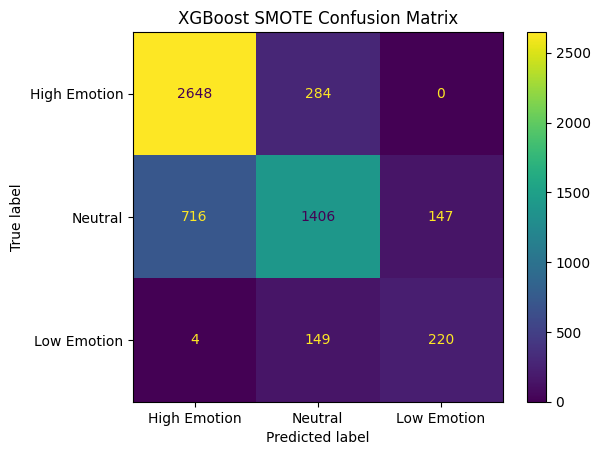

In [84]:
cm_xgb_smote = confusion_matrix(y_test_labels, xgb_model_smote_pred_labels, labels=LABELS)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_smote, display_labels=LABELS)

disp.plot(values_format='')
plt.title("XGBoost SMOTE Confusion Matrix")
plt.grid(False)
plt.show()

In [85]:
# Save the model
with open("models/xgb_smote_model.pkl", "wb") as f:
    pickle.dump(xgb_smote, f)